In [230]:
import pandas as pd
pd.set_option('display.max_columns',50)

import numpy as np
import os
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Summarise the dataset

In [185]:
arabica_df=pd.read_csv('/Users/peace/standalone_projects/experian_coffee/data/arabica_final.csv')

In [186]:
arabica_df=arabica_df.rename(columns={'Country.of.Origin':'Country_of_Origin','Farm.Name':'Farm_Name','Lot.Number':'Lot_Number','ICO.Number':'ICO_Number','Number.of.Bags':'Number_of_Bags','Bag.Weight':'Bag_Weight','In.Country.Partner':'In_Country_Partner','Harvest.Year':'Harvest_Year','Grading.Date':'Grading_Date','Processing.Method':'Processing_Method','Clean.Cup':'Clean_Cup','Total.Cup.Points':'Total_Cup_Points','Category.One.Defects':'Category_One_Defects','Category.Two.Defects':'Category_Two_Defects','Certification.Body':'Certification_Body','Certification.Address':'Certification_Address','Certification.Contact':'Certification_Contact','Cupper.Points':'Cupper_Points'})

In [187]:
arabica_df.describe(include='object')

,Species,Owner,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Region,Producer,Bag_Weight,In_Country_Partner,Harvest_Year,Grading_Date,Owner.1,Variety,Processing_Method,Color,Expiration,Certification_Body,Certification_Address,Certification_Contact
count,1439,1432,1438,1062,398,1112,1257,1230,1381,1207,1439,1439,1392,1439,1432,1238,1287,1222,1439,1439,1439,1439
unique,1,339,36,605,317,496,916,300,372,734,61,31,50,632,347,32,5,9,631,30,46,43
top,Arabica,juan luis alvarado romero,mexico,various,1,beneficio ixchel,0,"unex guatemala, s.a.",huila,la plata,1 kg,Specialty Coffee Association,2012,"July 11th, 2012",Juan Luis Alvarado Romero,Caturra,Washed / Wet,Green,"July 11th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660
freq,1439,155,240,75,30,92,67,87,121,39,329,298,352,25,155,273,900,938,25,298,293,295


In [222]:
arabica_df.describe()

,Number_of_Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Category_Two_Defects
count,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000
mean,161.424200,7.576613,7.533971,7.408971,7.546057,7.530953,7.529096,9.847636,9.848783,9.915522,7.504805,82.244228,0.090513,0.394993,0.263561,3.539638
std,135.909707,0.314801,0.340849,0.346452,0.318332,0.290784,0.344354,0.489283,0.702119,0.447359,0.410444,2.693403,0.046520,1.755723,1.077740,5.181953
min,0.000000,5.080000,6.080000,6.170000,5.250000,5.250000,6.080000,6.000000,0.000000,1.330000,5.170000,59.830000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.330000,81.250000,0.100000,0.000000,0.000000,0.000000
50%,200.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.580000,0.110000,0.000000,0.000000,2.000000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000
max,1280.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,31.000000,18.000000,55.000000


* The minimum values of some cols (Aroma, Flavor, Aftertaste...) are zero, which is quite strange (del the row)

In [189]:
# Delete the only row that has all zero gradings
error_index=arabica_df[arabica_df['Flavor']==0].index.values[0]
arabica_df=arabica_df.drop(error_index)

## Check Missing Values

In [191]:
total=arabica_df.isnull().sum().sort_values(ascending=False)
percentage=(total/arabica_df.isnull().count()).sort_values(ascending=False)

In [214]:
arabica_df[arabica_df['Altitude'].isnull()].shape

(227, 39)

In [192]:
percentage.head(17)

Lot_Number           0.723922
Farm_Name            0.262170
Mill                 0.227399
Producer             0.161335
Altitude             0.157858
Color                0.150904
Company              0.145341
Variety              0.139777
ICO_Number           0.126565
Processing_Method    0.105007
Cupper_Points        0.089013
Region               0.040334
Harvest_Year         0.032684
Owner.1              0.004868
Owner                0.004868
Quakers              0.000695
Country_of_Origin    0.000695
dtype: float64

### Delete Cols with High Percentage of Missing Values

In [217]:
arabica_df.drop(['Lot_Number','Farm_Name','Mill','Producer','Altitude'],1,inplace=True)

### Impute Missing Values

#### Quakers
One missing value
* Only 1/54 coffee beans from the same owner have one Quaker

In [195]:
arabica_df['Quakers']=arabica_df['Quakers'].fillna(0)

#### Cupper Points
The newly scrapped data dosen't have cupper_points col
* Fill nan with the median value from the same In_Country_Partner
* Fill the rest nan with the median value of the dataset

In [196]:
arabica_df['Cupper_Points']=arabica_df.groupby('In_Country_Partner').Cupper_Points.apply(lambda s: s.fillna(s.median()))
arabica_df['Cupper_Points']=arabica_df['Cupper_Points'].fillna(arabica_df['Cupper_Points'].median())

/anaconda3/envs/coffee_recommendation/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## Clustering


In [227]:
# Prepare the data
X = arabica_df.select_dtypes(exclude=['object'])
X.drop('Number_of_Bags',1,inplace=True)
X.isnull().sum()

/anaconda3/envs/coffee_recommendation/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean_Cup               0
Sweetness               0
Cupper_Points           0
Total_Cup_Points        0
Moisture                0
Category_One_Defects    0
Quakers                 0
Category_Two_Defects    0
dtype: int64

### K-Means with euclidean distance

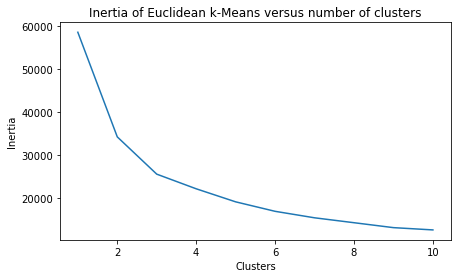

In [318]:
# Elbow method to determine the number of clusters 
from sklearn.cluster import KMeans

clusters=[]

for i in range(1,11):
    km=KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig,ax=plt.subplots(figsize=(7,4))
sns.lineplot(x=list(range(1,11)),y=clusters,ax=ax)
ax.set_title('Inertia of Euclidean k-Means versus number of clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

As can be seen from the graph, 3 is the last bend.

### K-means with cosine distance

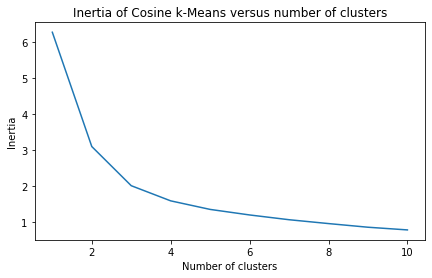

In [317]:
from sklearn import preprocessing

clusters=[]

normalized_vectors=preprocessing.normalize(X)
for i in range(1,11):
    km=KMeans(n_clusters=i).fit(normalized_vectors)
    clusters.append(km.inertia_)

fig,ax=plt.subplots(figsize=(7,4))
sns.lineplot(np.arange(1,11),clusters)

plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")

plt.show()

### DBSCAN (based on the density of data points)
* minPts: at least the number of features in your data
* eps: 

### Evaluation (Sihouette Score)
(b-a)/max(a,b)
* a- mean intra-cluster distance
* b- mean nearest-cluster distance

In [263]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# prepare models
kmeans=KMeans(n_clusters=3).fit(X)

normalized_vectors=preprocessing.normalize(X)
normalized_kmeans=KMeans(n_clusters=3).fit(normalized_vectors)

min_samples=X.shape[1]+1
dbscan=DBSCAN(eps=3.5,min_samples=min_samples).fit(X)

print('kmeans: {}'.format(silhouette_score(X, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))
print('DBSCAN: {}'.format(silhouette_score(X, dbscan.labels_, 
                                           metric='cosine')))


kmeans: 0.49713662963150945
Cosine kmeans:0.7583882657229923
DBSCAN: 0.8552035848883137


As can be seen above, DBSCAN > Cosine > kmeans. Cosine similarity works better due to the high dimensionality of the data

### Visualizing Clusters (PCA & t_SNE)

In [306]:
from sklearn.decomposition import PCA
def pca_prepare(n_components=2,df,labels):
    pca=PCA(n_components=n_components)
    pca_data=pca.fit_transform(df)
    pca_data=np.vstack([pca_data.T,labels]).T
    pca_df=pd.DataFrame(pca_data,columns=['x','y','labels'])
    return pca_df

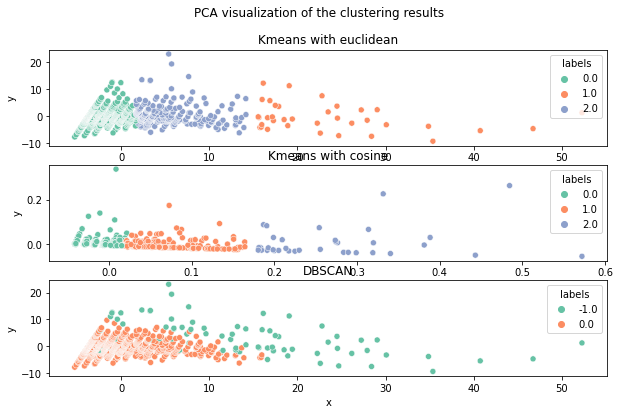

In [331]:
pca_df_kmeans=pca_prepare(2,X,kmeans.labels_)
pca_df_cosine_kmeans=pca_prepare(2,normalized_vectors,normalized_kmeans.labels_)
pca_df_DBSCAN=pca_prepare(2,X,dbscan.labels_)

fig,axes=plt.subplots(3,figsize=(10,6))
sns.scatterplot(ax=axes[0],x=pca_df_kmeans.x, y=pca_df_kmeans.y,hue=pca_df_kmeans.labels, palette='Set2').set(title='Kmeans with euclidean')
sns.scatterplot(ax=axes[1],x=pca_df_cosine_kmeans.x, y=pca_df_cosine_kmeans.y,hue=pca_df_cosine_kmeans.labels, palette='Set2').set(title='Kmeans with cosine')
sns.scatterplot(ax=axes[2],x=pca_df_DBSCAN.x, y=pca_df_DBSCAN.y,hue=pca_df_DBSCAN.labels, palette='Set2').set(title='DBSCAN')

fig.suptitle('PCA visualization of the clustering results')
fig.show()

In [334]:
from sklearn.manifold import TSNE
def tsne_prepare(n_components,df,labels):
    tsne=TSNE(n_components=n_components)
    tsne_data=tsne.fit_transform(df)
    tsne_data=np.vstack([tsne_data.T,labels]).T
    tsne_df=pd.DataFrame(tsne_data,columns=['x','y','z','labels'])
    return tsne_df

In [335]:
tsne_3d_df_kmeans = tsne_prepare(3, X, kmeans.labels_)
tsne_3d_df__cosine_kmeans = tsne_prepare(3, normalized_vectors,normalized_kmeans.labels_)
tsne_3d_df_dbscan = tsne_prepare(3, X, dbscan.labels_)

plot_animation(tsne_3d_df_kmeans, 'kmeans', 'kmeans')
plot_animation(tsne_3d_df__cosine_kmeans, 'normalized_kmeans', 'normalized_kmeans')
plot_animation(tsne_3d_df_dbscan, 'dbscan', 'dbscan')

NameError: name 'plot_animation' is not defined